In [158]:
#import of required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  
import seaborn
%matplotlib inline
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score
%pylab inline
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [191]:
#loading dataset
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/MLTechnologies_Course/bioresponse.csv')
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#import scaler to standardize predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
#highlighting predictors X and responses Y="Activity"
Y = df["Activity"].values
X = scaler.fit_transform(df.drop(["Activity"], axis=1))

In [15]:
#splitting data into train-test subsamples for a subsequent model training
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [143]:
#function that calculates and shows all required metrics for binary classification task: accuracy, precision, recall, f1-score, logloss
def displayMetrics(test_labels, predictions):
  print("Accuracy =", accuracy_score(test_labels,predictions))
  print("Precision =", precision_score(test_labels,predictions))
  print("Recall =", recall_score(test_labels,predictions))
  print("F1-score =", f1_score(test_labels,predictions))
  print("Log-loss =", log_loss(test_labels,predictions))

In [177]:
#function that calculates and shows precision-recall curves for all trained models
from sklearn.metrics import precision_recall_curve
def displayPrecisionRecallCurves(test_labels, probabilities, labels):
  precs = []
  recs = []
  threshs = []
  for prediction in probabilities:
    prec, rec, thresh = precision_recall_curve(test_labels, prediction)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
  plt.figure(figsize=(15,5))
  plt.grid()
  for i in range(len(probabilities)):
    ax=plt.subplot(1,4,i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("Threshold")
    ax.set_title(labels[i])
    plt.legend()

In [189]:
#function that calculates and displays ROC-curves with corresponding AUC-values for each trained model
def displayROCCurves(test_labels, probabilities, labels):
  fprs=[]
  tprs=[]
  thrs=[]
  for prediction in probabilities:
    fpr, tpr, thr = roc_curve(test_labels, prediction)
    fprs.append(fpr)
    tprs.append(tpr)
    thrs.append(thr)
  plt.figure(figsize = (9,6))
  plt.grid()
  for i in range(len(probabilities)):
    ax=plt.subplot()
    plt.plot(fprs[i], tprs[i], label=u'ROC '+labels[i]+'\n'+'ROC AUC = ' + str(round(roc_auc_score(test_labels,probabilities[i]),2)))
    plt.xlabel("false positive rate",fontsize = 15)
    plt.ylabel("true positive rate",fontsize = 15)
    ax.set_title("ROC-Curves")
    plt.legend()

In [144]:
#training of a small decision tree on train subsample and calculating predicted bioactivity and corresponding probabilities
tree_small = tree.DecisionTreeClassifier(max_depth=3,random_state=1)
tree_small.fit(train_data, train_labels)
tree_predictions_small = tree_small.predict(test_data)
tree_predicted_probs_small=tree_small.predict_proba(test_data)
displayMetrics(test_labels,tree_predictions_small)

Accuracy = 0.7673179396092362
Precision = 0.783410138248848
Recall = 0.8082408874801902
F1-score = 0.795631825273011
Log-loss = 8.036653782152982


In [179]:
#training of a deep decision tree on train subsample and calculating predicted bioactivity and corresponding probabilities
tree_deep = tree.DecisionTreeClassifier(max_depth=20,random_state=1)
tree_deep.fit(train_data, train_labels)
tree_predictions_deep = tree_deep.predict(test_data)
tree_predicted_probs_deep=tree_deep.predict_proba(test_data)
displayMetrics(test_labels,tree_predictions_deep)

Accuracy = 0.7060390763765542
Precision = 0.7358490566037735
Recall = 0.7416798732171157
F1-score = 0.7387529597474349
Log-loss = 10.153169910376297


In [181]:
#training of a random forest with 50 small trees on train subsample and calculating predicted bioactivity and corresponding probabilities
rf_small = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 1, bootstrap=True)
rf_small.fit(train_data, train_labels)
rf_predictions_small = rf_small.predict(test_data)
rf_predicted_probs_small=rf_small.predict_proba(test_data)
displayMetrics(test_labels, rf_predictions_small)

Accuracy = 0.7184724689165186
Precision = 0.7378787878787879
Recall = 0.7717908082408875
F1-score = 0.7544539116963594
Log-loss = 9.72373929621857


In [183]:
#training of a random forest with 50 deep trees on train subsample and calculating predicted bioactivity and corresponding probabilities
rf_deep = RandomForestClassifier(n_estimators = 50, max_depth = 20, random_state = 1, bootstrap=True)
rf_deep.fit(train_data, train_labels)
rf_predictions_deep = rf_deep.predict(test_data)
rf_predicted_probs_deep=rf_deep.predict_proba(test_data)
displayMetrics(test_labels, rf_predictions_deep)

Accuracy = 0.7912966252220248
Precision = 0.8245901639344262
Recall = 0.7971473851030111
F1-score = 0.8106365834004835
Log-loss = 7.208435177379255


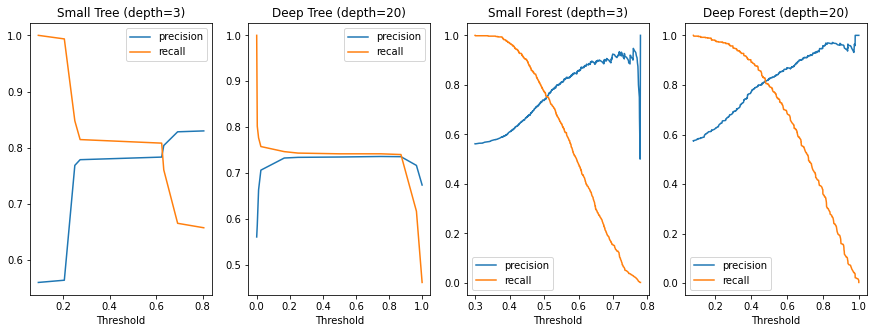

In [185]:
#results of precisionrecallcurve calculations
displayPrecisionRecallCurves(test_labels,[tree_predicted_probs_small[:,1], tree_predicted_probs_deep[:,1], rf_predicted_probs_small[:,1], rf_predicted_probs_deep[:,1]],["Small Tree (depth=3)", "Deep Tree (depth=20)", "Small Forest (depth=3)", "Deep Forest (depth=20)"])

For all graphs expected dependencies are shown: recall decreases with threshold growth while precision increases since the more threshold the more false negative results are observed.
For decision trees the intersection of two curves is shifted to the right. For random forests this value is close to 0.5.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

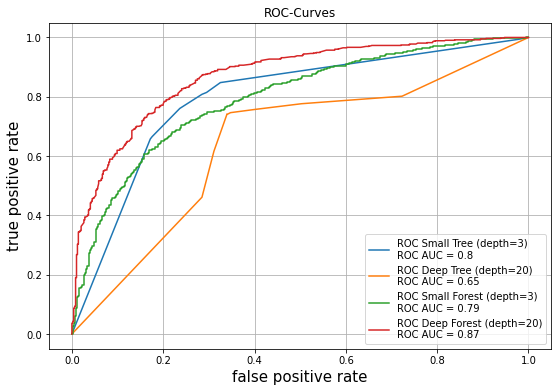

In [190]:
displayROCCurves(test_labels,[tree_predicted_probs_small[:,1], tree_predicted_probs_deep[:,1], rf_predicted_probs_small[:,1], rf_predicted_probs_deep[:,1]],["Small Tree (depth=3)", "Deep Tree (depth=20)", "Small Forest (depth=3)", "Deep Forest (depth=20)"])

In fact, when observing metrics especially balanced metric f1-score, AUC-values, one can infer the order in which model quality increases: Deep Tree < Small Forest< Small Tree < Deep Forest
Deep Tree with a depth of 20 seems overfitted so it shows worse metrics.
Small Forest with 50 estimators performs a bit worse than a single decision tree but when tuning hyperparameters the quality can be improved.
The best choice for this classification problem is deep random forest as it shows best metrics therefore it is trained well.

In [163]:
#avoiding false negatives in deep random forest model; the threshold value was approximately chosen with the usage of precision-recall curve
rf_deep_FN=RandomForestClassifier(n_estimators = 50, max_depth = 25, random_state = 1, bootstrap=True)
rf_deep_FN.fit(train_data, train_labels)
rf_predictions_deep_FN = rf_deep_FN.predict(test_data)
rf_predicted_probs_deep_FN=rf_deep_FN.predict_proba(test_data)
threshold = 0.05
for i in range(0,len(rf_predicted_probs_deep_FN[:,1])):
  if (rf_predicted_probs_deep_FN[:,1][i]<=threshold):
    rf_predicted_probs_deep_FN[:,1][i]=0
  else:
    rf_predicted_probs_deep_FN[:,1][i]=1
displayMetrics(test_labels,rf_predicted_probs_deep_FN[:,1])

Accuracy = 0.5746003552397868
Precision = 0.5684684684684684
Recall = 1.0
F1-score = 0.7248707639287766
Log-loss = 14.693123357310197


Model that avoids false negatives, as it was expected, shows recall=1. However, other metrics suffer because of accumulating false positives. However, the model definitely will find all bioactive molecules.